In [16]:
# importing libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
# load dataset

df = pd.read_excel('E:\Projects\Market_Basket_Analysis\market_basket.xlsx' )
df.head()

,Hair_Conditioner,Lemons,Standard_coffee,Frozen_Chicken_Wings,98pct_Fat_Free_Hamburger,Sugar_Cookies,Onions,Deli_Ham,Dishwasher_Detergent,Beets,...,Salt,Green_Beans,flav_Ice,Imported_Beer,Grits,Apple_Jelly,Beef_Jerky,Potatoes,Small_Eggs,Silver_Cleaner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('Observations: ',df.shape[0])
print('Products: ',df.shape[1])

Observations:  1361
Products:  303


In [8]:
# functions

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = df.applymap(encode_units)

In [9]:
# apriori rules

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [10]:
# creating rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [11]:
# support analysis

# support means the popularity of item
# eggs are the most popular antecedent item in this market

rules.sort_values(by= 'antecedent support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Eggs),(2pct_Milk),0.122704,0.109478,0.052168,0.425150,3.883414,0.038734,1.549137
6,(Eggs),(White_Bread),0.122704,0.119030,0.055107,0.449102,3.773010,0.040501,1.599152
1,(White_Bread),(Potato_Chips),0.119030,0.097722,0.051433,0.432099,4.421702,0.039801,1.588793
5,(White_Bread),(2pct_Milk),0.119030,0.109478,0.051433,0.432099,3.946889,0.038402,1.568093
7,(White_Bread),(Eggs),0.119030,0.122704,0.055107,0.462963,3.773010,0.040501,1.633586
2,(2pct_Milk),(Eggs),0.109478,0.122704,0.052168,0.476510,3.883414,0.038734,1.675861
4,(2pct_Milk),(White_Bread),0.109478,0.119030,0.051433,0.469799,3.946889,0.038402,1.661576
0,(Potato_Chips),(White_Bread),0.097722,0.119030,0.051433,0.526316,4.421702,0.039801,1.859825


In [12]:
# support analysis

# support means the popularity of item
# eggs are the most popular consequent item in this market

rules.sort_values(by= 'consequent support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(2pct_Milk),(Eggs),0.109478,0.122704,0.052168,0.476510,3.883414,0.038734,1.675861
6,(White_Bread),(Eggs),0.119030,0.122704,0.055107,0.462963,3.773010,0.040501,1.633586
1,(Potato_Chips),(White_Bread),0.097722,0.119030,0.051433,0.526316,4.421702,0.039801,1.859825
5,(2pct_Milk),(White_Bread),0.109478,0.119030,0.051433,0.469799,3.946889,0.038402,1.661576
7,(Eggs),(White_Bread),0.122704,0.119030,0.055107,0.449102,3.773010,0.040501,1.599152
3,(Eggs),(2pct_Milk),0.122704,0.109478,0.052168,0.425150,3.883414,0.038734,1.549137
4,(White_Bread),(2pct_Milk),0.119030,0.109478,0.051433,0.432099,3.946889,0.038402,1.568093
0,(White_Bread),(Potato_Chips),0.119030,0.097722,0.051433,0.432099,4.421702,0.039801,1.588793


In [12]:
# confidence analysis

# the best confidence is between potato chips and bread. COMBINATION OF HOT DOG, HAMBURGUERS AND SANDWICHS!!!!! NIICE

# confidence is probability of buy consequent item if buy antecedent item
# the better combination
rules.sort_values(by= 'confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Potato_Chips),(White_Bread),0.097722,0.119030,0.051433,0.526316,4.421702,0.039801,1.859825
2,(2pct_Milk),(Eggs),0.109478,0.122704,0.052168,0.476510,3.883414,0.038734,1.675861
4,(2pct_Milk),(White_Bread),0.109478,0.119030,0.051433,0.469799,3.946889,0.038402,1.661576
7,(White_Bread),(Eggs),0.119030,0.122704,0.055107,0.462963,3.773010,0.040501,1.633586
6,(Eggs),(White_Bread),0.122704,0.119030,0.055107,0.449102,3.773010,0.040501,1.599152
1,(White_Bread),(Potato_Chips),0.119030,0.097722,0.051433,0.432099,4.421702,0.039801,1.588793
5,(White_Bread),(2pct_Milk),0.119030,0.109478,0.051433,0.432099,3.946889,0.038402,1.568093
3,(Eggs),(2pct_Milk),0.122704,0.109478,0.052168,0.425150,3.883414,0.038734,1.549137


(array([0, 1, 2, 3]),
 [Text(0, 0, "frozenset({'Potato_Chips'})"),
  Text(1, 0, "frozenset({'White_Bread'})"),
  Text(2, 0, "frozenset({'2pct_Milk'})"),
  Text(3, 0, "frozenset({'Eggs'})")])

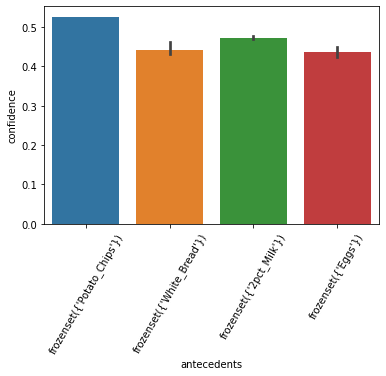

In [19]:
ax= sns.barplot(data = rules, x = 'antecedents', y = 'confidence')
plt.xticks(rotation=60)

(array([0, 1, 2, 3]),
 [Text(0, 0, "frozenset({'Potato_Chips'})"),
  Text(1, 0, "frozenset({'White_Bread'})"),
  Text(2, 0, "frozenset({'2pct_Milk'})"),
  Text(3, 0, "frozenset({'Eggs'})")])

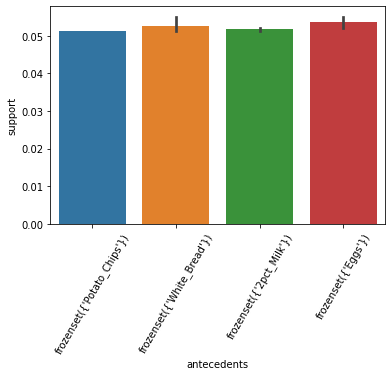

In [21]:
ax= sns.barplot(data = rules, x = 'antecedents', y = 'support')
plt.xticks(rotation=60)

(array([0, 1, 2, 3]),
 [Text(0, 0, "frozenset({'Potato_Chips'})"),
  Text(1, 0, "frozenset({'White_Bread'})"),
  Text(2, 0, "frozenset({'2pct_Milk'})"),
  Text(3, 0, "frozenset({'Eggs'})")])

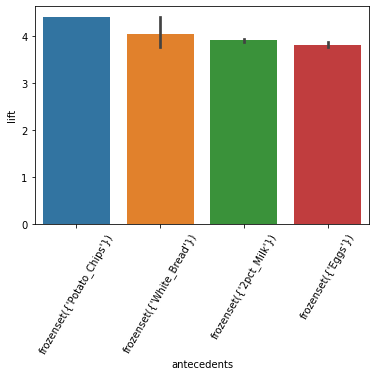

In [22]:
ax= sns.barplot(data = rules, x = 'antecedents', y = 'lift')
plt.xticks(rotation=60)